In [2]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

%matplotlib inline

C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\muzzn\anaconda3\envs\PythonData\lib\site-packages

In [3]:
# load in the files
file = Path("../Resources/merged_covid.csv")
file1= Path("../Resources/government_regulation.csv")
file2= Path("../Resources/covid_stats.csv")
file3= Path("../Resources/merged_covid_stats_population.csv")

# read the files
df= pd.read_csv(file)
df_gov=pd.read_csv(file1)
df_st=pd.read_csv(file2)
df_pop=pd.read_csv(file3)


In [4]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object
(48591, 15)


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [5]:
# Check df_gov
print(df_gov.shape)
print(df_gov.dtypes)

# Display df
df_gov.head()



(57340, 8)
Date_updated                        object
CountryName                         object
CountryCode                         object
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,Date_updated,CountryName,CountryCode,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0


In [6]:
# Check df_gov
print(df_st.shape)
print(df_st.dtypes)

# Display df
df_st.head()

(34927, 10)
date_updated             object
iso_code                 object
continent                object
location                 object
new_cases               float64
new_deaths              float64
new_tests               float64
total_cases_updated     float64
total_deaths_updated    float64
total_tests_updated     float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0


In [7]:
# check merged df for null values.
df.describe()

,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
count,48591.000000,48591.000000,4.859100e+04,4.840100e+04,48401.000000,4.859100e+04,47852.000000,47852.000000,47731.000000,47852.000000,46911.000000
mean,6963.026137,216.707436,9.649910e+04,4.669529e+05,19638.592694,5.972463e+06,54.998629,61.056228,53.631534,55.611587,43.229200
std,15758.304949,520.361894,2.307435e+05,1.199741e+06,44926.853340,1.649185e+07,28.711626,29.466818,25.338390,26.103126,34.062708
min,-2461.000000,-1918.000000,-3.743000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,5.300000e+01,0.000000,0.000000e+00,36.110000,45.240000,41.670000,41.670000,0.000000
50%,34.000000,0.000000,0.000000e+00,1.965000e+03,45.000000,1.224000e+03,62.040000,70.240000,62.180000,63.260000,50.000000
75%,1075.000000,30.000000,1.346800e+04,7.240000e+04,2267.000000,8.247120e+05,77.780000,83.330000,72.120000,75.000000,75.000000
max,78761.000000,4928.000000,1.194086e+06,5.997163e+06,183069.000000,8.389842e+07,100.000000,100.000000,96.150000,100.000000,100.000000


In [8]:
# Check merged df with pop df.
print(df_pop.shape)
print(df_pop.dtypes)
df_pop.head()

(48591, 18)
date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
population                         float64
population_density                 float64
median_age                         float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,population,population_density,median_age,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,106766.0,584.8,41.2,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [9]:
# Create a df to test impact of some features on 'total deaths'
df_death_ml=df_pop[['population','population_density','median_age','total_cases_updated','StringencyIndex_updated','total_deaths_updated']]
df_death_ml

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766.0,584.800,41.2,2.0,0.00,0.0
1,106766.0,584.800,41.2,2.0,33.33,0.0
2,106766.0,584.800,41.2,4.0,33.33,0.0
3,106766.0,584.800,41.2,4.0,44.44,0.0
4,106766.0,584.800,41.2,4.0,44.44,0.0
...,...,...,...,...,...,...
48586,14862927.0,42.729,19.6,6251.0,80.56,179.0
48587,14862927.0,42.729,19.6,6292.0,80.56,189.0
48588,14862927.0,42.729,19.6,6388.0,80.56,195.0
48589,14862927.0,42.729,19.6,6406.0,80.56,196.0


In [10]:
df_death_ml.dtypes

population                 float64
population_density         float64
median_age                 float64
total_cases_updated        float64
StringencyIndex_updated    float64
total_deaths_updated       float64
dtype: object

In [11]:
df_death_ml.shape

(48591, 6)

In [12]:
df_death_ml=df_death_ml.dropna(how='any')
df_death_ml.shape

(45075, 6)

In [13]:
# Create a df to test impact of some features on 'total cases'
df_cases_ml=df_pop[['population','population_density','median_age','ContainmentHealthIndex_updated','StringencyIndex_updated','total_cases_updated']]
df_cases_ml

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,total_cases_updated
0,106766.0,584.800,41.2,3.03,0.00,2.0
1,106766.0,584.800,41.2,34.85,33.33,2.0
2,106766.0,584.800,41.2,34.85,33.33,4.0
3,106766.0,584.800,41.2,43.94,44.44,4.0
4,106766.0,584.800,41.2,43.94,44.44,4.0
...,...,...,...,...,...,...
48586,14862927.0,42.729,19.6,73.48,80.56,6251.0
48587,14862927.0,42.729,19.6,73.48,80.56,6292.0
48588,14862927.0,42.729,19.6,73.48,80.56,6388.0
48589,14862927.0,42.729,19.6,73.48,80.56,6406.0


## Predicting Number of Deaths- with NN Model

In [14]:
# create features(X) and target(y) sets
X = df_death_ml.drop(['total_deaths_updated'],axis=1).values

y = df_death_ml['total_deaths_updated'].values
y = y.reshape(-1,1)

In [15]:
X.shape

(45075, 5)

In [16]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [18]:
# Define the model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.05, epochs=200)

Train on 42821 samples, validate on 2254 samples
Epoch 1/200
42821/42821 [==============================] - 1s 26us/sample - loss: 1988971801.6757 - mean_squared_error: 1988971520.0000 - val_loss: 13792267434.8181 - val_mean_squared_error: 13792268288.0000
Epoch 2/200
42821/42821 [==============================] - 1s 28us/sample - loss: 1982019518.7909 - mean_squared_error: 1982021120.0000 - val_loss: 13724195344.8092 - val_mean_squared_error: 13724195840.0000
Epoch 3/200
42821/42821 [==============================] - 1s 30us/sample - loss: 1968962656.2104 - mean_squared_error: 1968962816.0000 - val_loss: 13622325984.8802 - val_mean_squared_error: 13622322176.0000
Epoch 4/200
42821/42821 [==============================] - 1s 28us/sample - loss: 1951058919.0866 - mean_squared_error: 1951058816.0000 - val_loss: 13485406920.3478 - val_mean_squared_error: 13485409280.0000
Epoch 5/200
42821/42821 [==============================] - 1s 28us/sample - loss: 1928308465.8426 - mean_squared_error:

42821/42821 [==============================] - 1s 18us/sample - loss: 474974713.5960 - mean_squared_error: 474974720.0000 - val_loss: 1235223482.9459 - val_mean_squared_error: 1235223552.0000
Epoch 41/200
42821/42821 [==============================] - 1s 18us/sample - loss: 455917693.1528 - mean_squared_error: 455917632.0000 - val_loss: 1078269670.5022 - val_mean_squared_error: 1078269824.0000
Epoch 42/200
42821/42821 [==============================] - 1s 27us/sample - loss: 437418043.9194 - mean_squared_error: 437417984.0000 - val_loss: 934022949.4800 - val_mean_squared_error: 934022912.0000
Epoch 43/200
42821/42821 [==============================] - 1s 22us/sample - loss: 419362024.5080 - mean_squared_error: 419361792.0000 - val_loss: 800464566.7152 - val_mean_squared_error: 800464384.0000
Epoch 44/200
42821/42821 [==============================] - 1s 22us/sample - loss: 401700244.3413 - mean_squared_error: 401700096.0000 - val_loss: 678081198.2822 - val_mean_squared_error: 678081280

42821/42821 [==============================] - 1s 22us/sample - loss: 116004259.8056 - mean_squared_error: 116004264.0000 - val_loss: 677850890.5626 - val_mean_squared_error: 677850880.0000
Epoch 81/200
42821/42821 [==============================] - 1s 22us/sample - loss: 114931368.9967 - mean_squared_error: 114931344.0000 - val_loss: 696092170.4490 - val_mean_squared_error: 696092352.0000
Epoch 82/200
42821/42821 [==============================] - 1s 22us/sample - loss: 113960445.9563 - mean_squared_error: 113960408.0000 - val_loss: 709618619.8829 - val_mean_squared_error: 709618688.0000
Epoch 83/200
42821/42821 [==============================] - 1s 21us/sample - loss: 113088848.2772 - mean_squared_error: 113088952.0000 - val_loss: 724668991.8580 - val_mean_squared_error: 724668800.0000
Epoch 84/200
42821/42821 [==============================] - 1s 22us/sample - loss: 112305334.5048 - mean_squared_error: 112305464.0000 - val_loss: 737944182.2893 - val_mean_squared_error: 737944192.000

42821/42821 [==============================] - 1s 20us/sample - loss: 105480859.7426 - mean_squared_error: 105480816.0000 - val_loss: 914051643.4002 - val_mean_squared_error: 914051712.0000
Epoch 121/200
42821/42821 [==============================] - 1s 20us/sample - loss: 105429863.2657 - mean_squared_error: 105429712.0000 - val_loss: 912638761.1713 - val_mean_squared_error: 912638784.0000
Epoch 122/200
42821/42821 [==============================] - 1s 20us/sample - loss: 105376397.0350 - mean_squared_error: 105376504.0000 - val_loss: 911757325.4020 - val_mean_squared_error: 911757184.0000
Epoch 123/200
42821/42821 [==============================] - 1s 20us/sample - loss: 105325177.1828 - mean_squared_error: 105325208.0000 - val_loss: 912982617.2138 - val_mean_squared_error: 912982720.0000
Epoch 124/200
42821/42821 [==============================] - 1s 20us/sample - loss: 105274649.1675 - mean_squared_error: 105274680.0000 - val_loss: 915296081.2635 - val_mean_squared_error: 915296320

42821/42821 [==============================] - 1s 20us/sample - loss: 103977317.9186 - mean_squared_error: 103977424.0000 - val_loss: 931170449.6043 - val_mean_squared_error: 931170560.0000
Epoch 161/200
42821/42821 [==============================] - 1s 20us/sample - loss: 103952427.1448 - mean_squared_error: 103952512.0000 - val_loss: 932464037.8776 - val_mean_squared_error: 932464064.0000
Epoch 162/200
42821/42821 [==============================] - 1s 20us/sample - loss: 103927628.8214 - mean_squared_error: 103927576.0000 - val_loss: 932874985.7959 - val_mean_squared_error: 932874880.0000
Epoch 163/200
42821/42821 [==============================] - 1s 21us/sample - loss: 103902246.1301 - mean_squared_error: 103902312.0000 - val_loss: 930890480.1562 - val_mean_squared_error: 930890560.0000
Epoch 164/200
42821/42821 [==============================] - 1s 21us/sample - loss: 103877383.8390 - mean_squared_error: 103877320.0000 - val_loss: 931823868.0248 - val_mean_squared_error: 931823744

42821/42821 [==============================] - 1s 24us/sample - loss: 103192610.3757 - mean_squared_error: 103192568.0000 - val_loss: 943227065.6398 - val_mean_squared_error: 943226944.0000


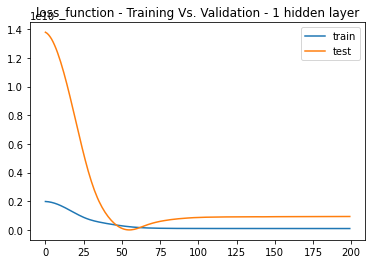

In [20]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

In [22]:
y_pred = nn.predict(X)

print(r2_score(y, y_pred))


0.9320567449903192
